# Table of Contents
 <p>
    <div class="lev1 toc-item"><a href="#General-data-Description-and-Duplicates" data-toc-modified-id="General-data-Description-and-Duplicates-1"><span class="toc-item-num">1.&nbsp;&nbsp;</span>General data Description and Duplicates</a></div>
    <div class="lev1 toc-item"><a href="#Understanding-Categorical-Variables" data-toc-modified-id="Understanding-Categorical-Variables-2"><span class="toc-item-num">2.&nbsp;&nbsp;</span>Understanding Categorical Variables</a></div>
    <div class="lev1 toc-item"><a href="#Correlations" data-toc-modified-id="Correlations-3"><span class="toc-item-num">3.&nbsp;&nbsp;</span>Correlations</a></div>
    <div class="lev3 toc-item"><a href="#Observations" data-toc-modified-id="Observations-3.1"><span class="toc-item-num">&emsp;3.1.&nbsp;&nbsp;</span>Observations</a></div>
    <div class="lev1 toc-item"><a href="#Potential-outliers" data-toc-modified-id="Potential-outliers-4"><span class="toc-item-num">4.&nbsp;&nbsp;</span>Potential outliers</a></div>
    <div class="lev1 toc-item"><a href="#'Quick-and-dirty'-linear-regression-model" data-toc-modified-id="'Quick-and-dirty'-linear-regression-model-5"><span class="toc-item-num">5.&nbsp;&nbsp;</span>'Quick and dirty' linear regression model</a></div>
    <div class="lev3 toc-item"><a href="#Prediction-pre-conclusions" data-toc-modified-id="Prediction-pre-conclusions-5.1"><span class="toc-item-num">&emsp;5.1.&nbsp;&nbsp;</span>Prediction pre-conclusions</a></div>
    <div class="lev1 toc-item"><a href="#Different-Regressors" data-toc-modified-id="Different-Regressors-6"><span class="toc-item-num">6.&nbsp;&nbsp;</span>Different Regressors</a></div>
    <div class="lev1 toc-item"><a href="#Advanced-Modelling" data-toc-modified-id="Advanced-Modelling-7"><span class="toc-item-num">7.&nbsp;&nbsp;</span>Advanced Modelling</a></div>
    <div class="lev1 toc-item"><a href="#Review-and-Conclusions" data-toc-modified-id="Review-and-Conclusions-8"><span class="toc-item-num">8.&nbsp;&nbsp;</span>Review and Conclusions</a></div>
    <div class="lev1 toc-item"><a href="#Advice-to-the-Management-Team" data-toc-modified-id="Advice-to-the-Management-Team-9"><span class="toc-item-num">9.&nbsp;&nbsp;</span>Advice to the Management Team</a></div>
    <div class="lev1 toc-item"><a href="#Next-steps" data-toc-modified-id="Next-steps-10"><span class="toc-item-num">10.&nbsp;&nbsp;</span>Next steps</a></div>

## General data Description and Duplicates

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import seaborn as sns
# read data in. Accound for the atypical way of marking 'Not a Number' values in the entry data.
data = pd.read_csv('sales_data.csv',na_values=['"NA"','Nan'])

In [2]:
# visualize the content of the data
data.describe()

,product_sales_volume,competitor_product_price,average_income,advertising_costs,population,product_price,representative_age,education_level
count,463.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000
mean,10.914017,124.346983,71.284483,7.109914,280.420259,112.172414,50.043103,13.381466
std,61.926532,17.634711,26.950016,6.306326,142.487702,24.146520,17.282255,2.768022
min,0.000000,-60.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.735000,116.000000,46.750000,0.000000,152.000000,91.000000,33.000000,11.000000
50%,7.820000,125.000000,74.500000,8.000000,303.500000,111.500000,50.000000,13.000000
75%,10.650000,133.250000,89.000000,11.000000,380.000000,129.000000,64.000000,16.000000
max,1339.000000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [3]:
# clearly we would not expect negative prices! we will therefore delete the entries where competitor product price is negative
data = data[data.competitor_product_price>0]
# the columns are not necessarily numerical. let's see what types they are
print(data.dtypes)

product_sales_volume        float64
competitor_product_price    float64
average_income              float64
advertising_costs           float64
population                  float64
product_price               float64
shelf_location               object
representative_age          float64
education_level             float64
is_urban                     object
is_US                        object
dtype: object


In [4]:
# also, there might be duplicates
print(data[data.duplicated()].head())
# we confirmed that there are 60 duplicates accross all columns. now we can drop these
data = data.drop_duplicates()
# however, we have to verify if there are duplicates in the subset of endogeneous variables (excluding the target variable)
print(data[data[[col for col in data.columns if col!='product_sales_volume']].duplicated()])
# luckily, there are now such cases

     product_sales_volume  competitor_product_price  average_income  \
123                 11.67                     125.0            89.0   
124                 11.67                     125.0            89.0   
125                 11.67                     125.0            89.0   
126                 11.67                     125.0            89.0   
127                 11.67                     125.0            89.0   

     advertising_costs  population  product_price shelf_location  \
123               10.0       380.0           87.0            Bad   
124               10.0       380.0           87.0            Bad   
125               10.0       380.0           87.0            Bad   
126               10.0       380.0           87.0            Bad   
127               10.0       380.0           87.0            Bad   

     representative_age  education_level is_urban is_US  
123                28.0             10.0      Yes   Yes  
124                28.0             10.0      Ye

## Understanding Categorical Variables

In [5]:
# Most of the columns are numerical. Let's start by looking at the non-numerical entries
data_nonNum = data[['shelf_location','is_urban','is_US']]
print('The non numerical variables have the following numbers of unique entries: ')
print(data_nonNum.nunique())
print('These unique entries are distributed as follows:')
for col in data_nonNum.columns:
    print(data_nonNum[col].value_counts())

The non numerical variables have the following numbers of unique entries: 
shelf_location    3
is_urban          2
is_US             2
dtype: int64
These unique entries are distributed as follows:
Medium    220
Bad        96
Good       86
Name: shelf_location, dtype: int64
Yes    284
No     118
Name: is_urban, dtype: int64
Yes    260
No     142
Name: is_US, dtype: int64


In [6]:
# To ensure that we can treat the non-numerical entries as categorical variables, we will need to convert them to booleans
# The shelf_location variable has three possible cathegories, so we will create two new variables
processed_data = data[[col for col in data.columns if data[col].dtypes == 'float64' ]].copy(deep=True)

processed_data['shelf_location_Good'] = pd.get_dummies(data['shelf_location'])['Good']
processed_data['shelf_location_Bad'] = pd.get_dummies(data['shelf_location'])['Bad']

processed_data['is_urban'] = data['is_urban'].map({'Yes':1,'No':0})

processed_data['is_US'] = data['is_US'].map({'Yes':1,'No':0})

## Correlations
Now that we have all data in a numerical format, we can start analyzing the correlations between these variables

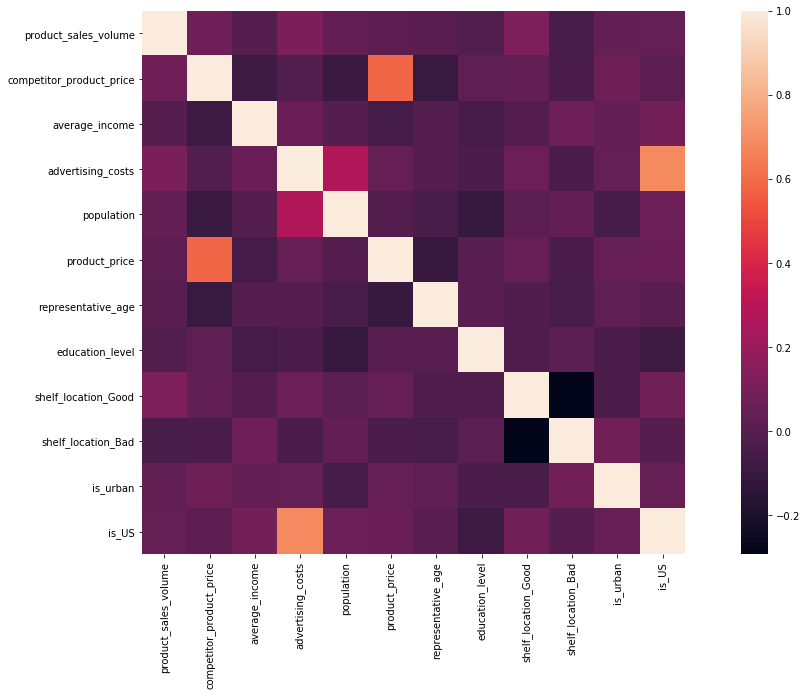

In [7]:
plt.subplots(figsize=(20, 10))
sns.heatmap(processed_data.corr(), square=True)

##### Observations
1. There is a significant correlation between the product price and competitor's product price. That was to be expected
2. The advertising costs seems to be higher for US and also highly correlated with the population size.
3. The top two contributors to the sales volume are the advertising costs and the position on the shelf when the position is good.
4. There are correlations worth noted between the product price, representative age, education level and position on the shelf.

## Potential outliers

Text(0.5, 1.0, 'Distribution of sales volume')

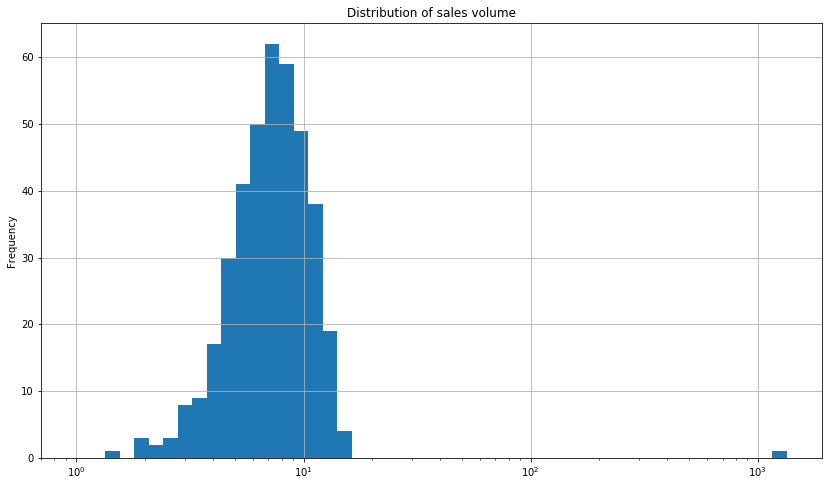

In [8]:
# let's review the distribution of values in the target variable. are there any outliers?
bins = np.logspace(np.log10(processed_data['product_sales_volume'].min()+1),
                   np.log10(processed_data['product_sales_volume'].max()+1),
                  50)
plt.figure(figsize=(14, 8))
processed_data['product_sales_volume'].plot.hist(bins=bins)
plt.xscale('log')
plt.grid()
plt.title('Distribution of sales volume')

     product_sales_volume  competitor_product_price  average_income  \
352                1339.0                     147.0            65.0   

     advertising_costs  population  product_price shelf_location  \
352               20.0       366.0          133.0           Good   

     representative_age  education_level is_urban is_US  
352                57.0             13.0      Yes   Yes  


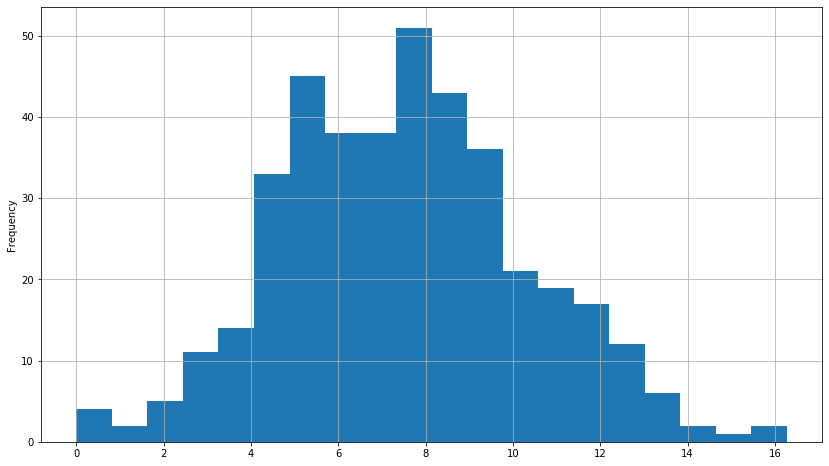

In [9]:
# There is one outlier in the target value. All sales volumes are in the region 0-10. Let's understand the outlier
print(data[data['product_sales_volume']>20])

# Now let's confirm if the histogram changes shape after eliminating the outlier
plt.figure(figsize=(14, 8))
processed_data[processed_data['product_sales_volume']<20].product_sales_volume.plot.hist(bins=20)
plt.grid()

# we conclude that we need to exclude the outlier
processed_data = processed_data[processed_data['product_sales_volume']<20]

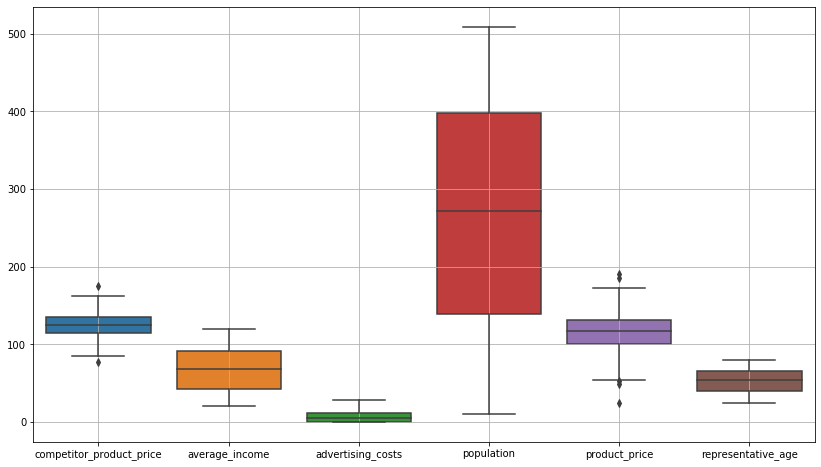

In [10]:
# Now let's make a sanity check on the other numerical features
plt.figure(figsize=(14,8))
sns.boxplot(data=processed_data[['competitor_product_price', 'average_income','advertising_costs', 'population', 
                                 'product_price','representative_age']])
plt.grid()

## 'Quick and dirty' linear regression model

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

sc_X = MinMaxScaler(); sc_y = MinMaxScaler()

X = sc_X.fit_transform(processed_data[[col for col in processed_data if col != 'product_sales_volume']].values)
y = sc_y.fit_transform(processed_data['product_sales_volume'].values.reshape(-1,1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

linReg = LinearRegression().fit(X_train, y_train)

y_pred = linReg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print('The root mean squared error of the model is: {}'.format(round(rmse,2)))
print('The standard deviation of the sales volume is {}'.format(round(y.std(),2)))

The root mean squared error of the model is: 0.07
The standard deviation of the sales volume is 0.17


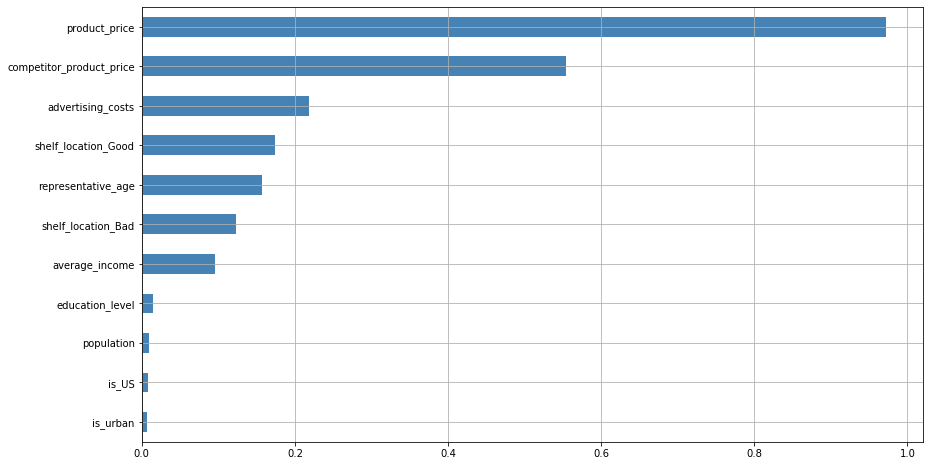

In [12]:
# The initial result was positive. Compared to a naive approach of predicting the average, the standard deviation of the 
# regression model is reduced by over 50%. Let's look at the importance of the features to the prediction
pd.Series(np.abs(linReg.coef_[0]), index=[col for col in processed_data if col != 'product_sales_volume']
         ).sort_values().plot.barh(color='steelblue', figsize=(14, 8))
plt.grid()

### Prediction pre-conclusions
1. The linear model yields a remarkable accuracy which is over 50% in excess of the accuracy of naively predicting the average, as measured by the root mean squared error
2. education lever, whether the product is sold in the US, whether the shopping is done in an urban area and the population size do not seem to help the model. 
3. When the shelf location is Medium, the location does not influence the model by any significant margin. Since this feature is redundant to the other two features describing the location on shelf, we will drop it.
4. The market is highly price sensitive. That is concluded from the high influence of both the product price and the competitor product price to the sales volumne. However, advertising costs, representative age, location on the shelf and the average income of the buyer are not to be excluded. Next, we will focus on these features and try another, more advanced model.

## Different Regressors

In [13]:
# first select the columns of interest
cols = ['competitor_product_price','product_price','advertising_costs','representative_age','shelf_location_Good',
        'shelf_location_Bad']
X = sc_X.fit_transform(processed_data[cols].values)
y = sc_y.fit_transform(processed_data['product_sales_volume'].values.reshape(-1,1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [14]:
from sklearn.ensemble import RandomForestRegressor

RF_reg = RandomForestRegressor(n_estimators=10, criterion='mse', max_depth=3, random_state=8)
RF_reg.fit(X_train,y_train.ravel())

y_pred = RF_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print('The root mean squared error of the model is: {}'.format(round(rmse,2)))
print('The standard deviation of the sales volume is {}'.format(round(y.std(),2)))

The root mean squared error of the model is: 0.13
The standard deviation of the sales volume is 0.17


In [15]:
# rather unexpectedly, the random forests regressor performs considerably worse than the linear regression model.
# Even when the whole set of features is considered, the RF underperforms. Let's try a different model
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(100,), solver="adam", activation="relu" ,alpha=0.0001, batch_size=10, 
                   learning_rate="constant", learning_rate_init=0.01, max_iter=100, early_stopping=True,
                   random_state=8)

mlp.fit(X_train,y_train.ravel())

y_pred_mlp = mlp.predict(X_test)
rmse_mlp = np.sqrt(mean_squared_error(y_pred_mlp, y_test))



linReg = LinearRegression().fit(X_train, y_train)
y_pred_linReg = linReg.predict(X_test)
rmse_linReg = np.sqrt(mean_squared_error(y_pred_linReg, y_test))

print('mlp rmse = {};\tlinear regression rmse = {}'.format(round(rmse_mlp,4),round(rmse_linReg,4)))
print('The standard deviation of the sales volume is {}'.format(round(y.std(),4)))

mlp rmse = 0.0835;	linear regression rmse = 0.0755
The standard deviation of the sales volume is 0.1734


## Advanced Modelling

Text(0.5, 1.0, 'Distribution of the $\\bf{compounded}$ absolute error across the sales volumes')

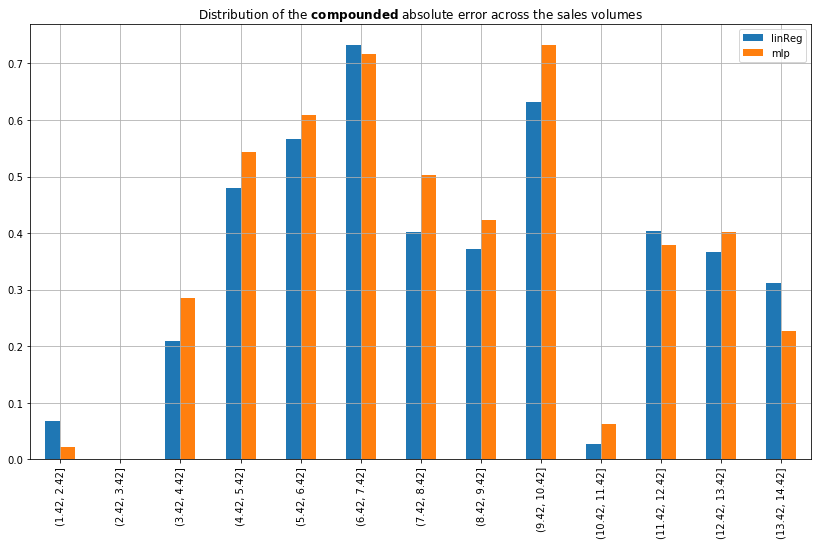

In [16]:
# The current multi layer perceptron model is matching the performance of the linear regression model.
# Let's verify if the error has the same distribution across the values of the target variable for both models.
# If not, then we can use an ensemble of the two models to further improve the accuracy
y_test_rescaled = sc_y.inverse_transform(y_test).ravel()

df_errors = pd.DataFrame(index=y_test_rescaled)
df_errors['linReg'] = np.abs(y_pred_linReg-y_test)
df_errors['mlp'] = np.abs(y_pred_mlp-y_test.ravel())

df = df_errors.groupby(pd.cut(df_errors.index, np.arange(df_errors.index.min(), df_errors.index.max(), 1))).sum()
df.plot(kind='bar',figsize=(14, 8))
plt.grid()
plt.title('Distribution of the {} absolute error across the sales volumes'.format(r"$\bf{compounded}$"))

The root mean squared error of the regression model is 1.228 in sales volume
To compare, the standard deviation of the target variable is 2.916


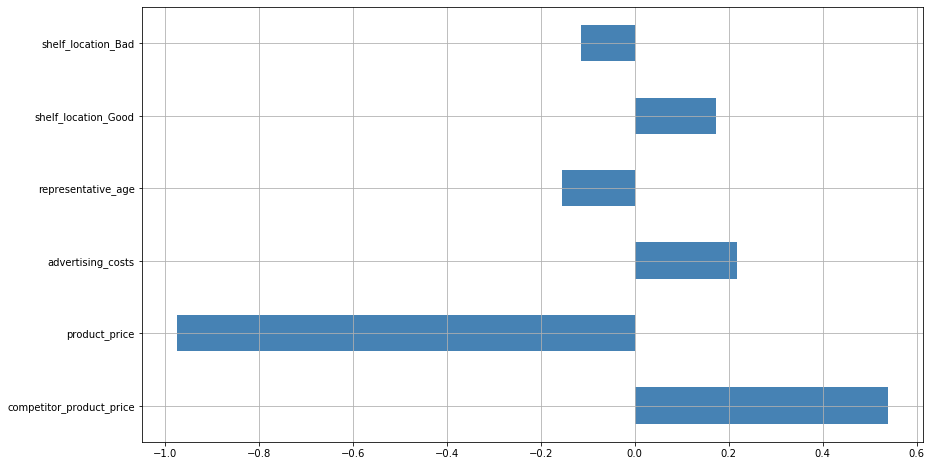

In [17]:
# We conclude that the two models that yield the maximum accuracy are consistent across the values of the target variable.
# This means that no massive gains in accuracy are expected by ensembling the two models.
# Therefore, the less complex model will be selected. Let's now compute some metrics for reporting before making the final remarks

# expected rmse of the prediction
print('The root mean squared error of the regression model is {} in sales volume'.
      format(round(sc_y.inverse_transform(rmse_linReg.reshape(1, -1))[0,0],3)))
print('To compare, the standard deviation of the target variable is {}'.format(round(y_test_rescaled.std(),3)))

# Impact of each feature
pd.Series(linReg.coef_[0], index=cols).plot.barh(color='steelblue', figsize=(14, 8),grid=True)

After combining the features related to the price, the new rmse = 0.08


Text(0.5, 1.0, 'Feature importances. Please note how relevant the price difference is')

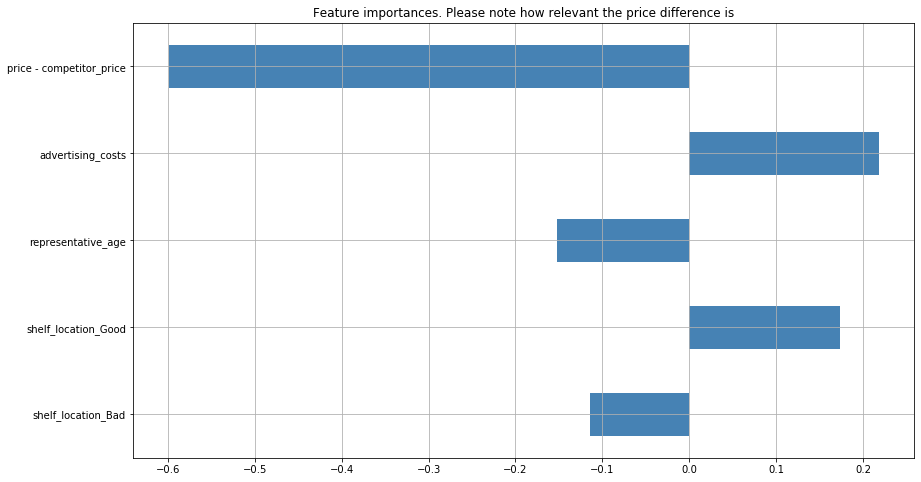

In [18]:
# since the product price and the competitor price are so correlated and have a high influence the target variable, we can
# test if a mathematical combination of the two would actualy maintain the same prediction power
processed_data_new = processed_data[['shelf_location_Bad','shelf_location_Good','representative_age','advertising_costs']].copy(deep=True)
processed_data_new['price - competitor_price'] = processed_data['product_price'] - processed_data['competitor_product_price']

X = sc_X.fit_transform(processed_data_new.values)
y = sc_y.fit_transform(processed_data['product_sales_volume'].values.reshape(-1,1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

linReg = LinearRegression().fit(X_train, y_train)
y_pred_linReg = linReg.predict(X_test)
rmse_linReg = np.sqrt(mean_squared_error(y_pred_linReg, y_test))

print('After combining the features related to the price, the new rmse = {}'.format(round(rmse_linReg,2)))

pd.Series(linReg.coef_[0], index=processed_data_new.columns).plot.barh(color='steelblue', figsize=(14, 8),grid=True)
plt.title('Feature importances. Please note how relevant the price difference is')

Only using price difference, the new rmse = 2.42


Text(0.5, 1.0, 'Prediction of the sales volume solely based on the price difference')

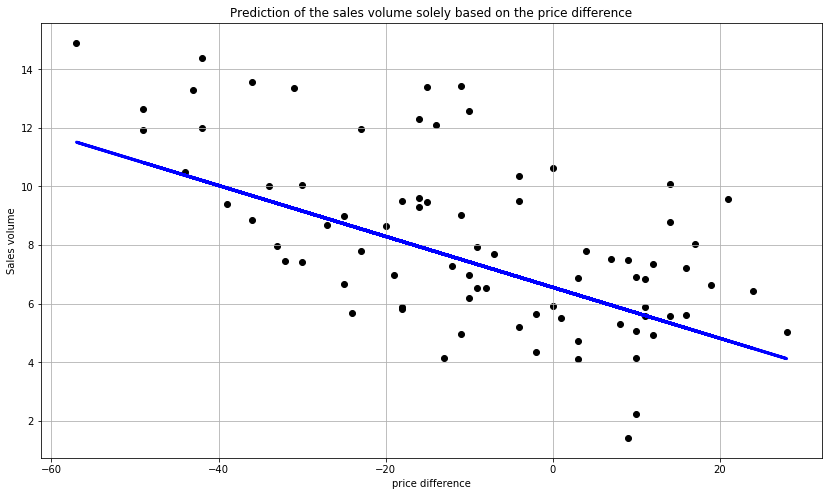

In [19]:
# let's see how we perform if we only consider the price difference as an indicator of sales volumes
X = processed_data_new['price - competitor_price']
y = processed_data['product_sales_volume']

X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1, 1), y.values.reshape(-1, 1),
                                                    test_size=0.2, random_state=8)

linReg = LinearRegression().fit(X_train, y_train)
y_pred_linReg = linReg.predict(X_test)
rmse_linReg = np.sqrt(mean_squared_error(y_pred_linReg, y_test))

print('Only using price difference, the new rmse = {}'.format(round(rmse_linReg,2)))

plt.figure(figsize=(14,8))
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred_linReg, color='blue', linewidth=3)
plt.grid()
plt.ylabel('Sales volume')
plt.xlabel('price difference')
plt.title('Prediction of the sales volume solely based on the price difference')

## Review and Conclusions

In this notebook, we analyzed a dataset of sales comprised of 466 data points. The following processing methods were applied:
1. We explored the features of the dataset.  
We determined that there are 3 categorical features. We also excluded 2 entries where the competitor product price was smaller or equal to zero
2. We checked for duplicates.  
We found that there were 60 duplicates over the list of features. We eliminated these.
3. We analyzed the categorical features  
We applied a one-hot encoder to the non-categorical variables
4. We analyzed the correlation between the variables in the processed dataset  
We drew some initial conclusions on the correlations between features and their use in predicting the target variable
5. We searched for outliers in the features  
One outlier was identified in the target variable and subsequently eliminated
6. We applied a linear regression model  
We obtained an initial root mean squared error of 1.4 in the sales volume, which was 50% lower than the naive approach of predicting the average. We assessed the contribution of each feature to the prediction and eliminated 5 features which contributed less to the model performance.
7. We tested additional models  
We trained a random forest regressor and a multilayer perceptron on the dataset. We concluded that only the latter can match the accuracy of the linear regressor.
8. We performed some advanced modeling techniques  
We analyzed the distribution of the compounded error across equal intervals in the target variable. concluded that both multilayer perceptron and linear regression perform similarly. We selected the linear model for the final report


To summarise:
1. We concluded that the market we are acting in is a highly price-sensitive one. However, the prices cannot be solely used to infer the sales volume, as these depend on the advertising investments, target age and the location on the shelves as well.
2. We report the root mean squared error for the out of sample prediction of 1.42. This should be compared against the naive benchmark of 'predicting the average', which yields 2.95 on the test set

## Advice to Management

1. Beating the competitor's price is your main concern. However, that does not guarantee the optimum number of sales
2. Investing in advertising and getting your product on the best shelf along with the advice in 1 almost guarantees success
3. Targeting younger customers has a positive expected return

## Next steps

1. Train regressors on multiple subsets of the features. Understand what else is needed besides beating the competitor's price to ensure success in sales
2. Collect a larger dataset. More complex models will eventually yield better results than linear regression, if enough data is fed in
3. Understand what we need to optimize. The sales volumes are not a good indicator of success if we are not making a profit. Engage with the project stakeholders to understand why the focus is on the number of sales.